In [1]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt
from scipy import stats
import scipy as sc

from mpl_toolkits import mplot3d

# Distribución Gaussiana
Hacemos la función de distribución normal:
\begin{equation}
P(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}
\end{equation}
con $\sigma = 2$ y $\mu = 70$

In [2]:
n  = 100000
x = np.linspace(60,80,n)
mu  = 70
sigma = 2
gauss = (1/(sigma*np.sqrt(2*np.pi)))*(np.exp(-np.divide(np.power((x-mu),2),2*(sigma)**2)))

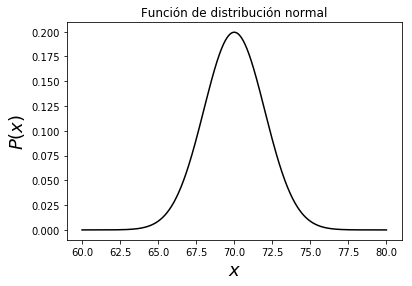

In [3]:
plt.plot(x,gauss,'k')
plt.title("Función de distribución normal")
plt.xlabel("$x$",fontsize  =18) 
plt.ylabel("$P(x)$",fontsize  =18);

Podemos encontrar la función de distribución acumulada de la forma:
\begin{equation}
F(x) = \frac{1}{2} \left[1 + efr\left(\frac{x-\mu}{\sigma\sqrt{2}}\right) \right]
\end{equation}
donde $efr(x)$ es la funcion error

In [4]:
gauss_ac=0.5*(1+sc.special.erf((x-mu)/(sigma*mt.sqrt(2))))

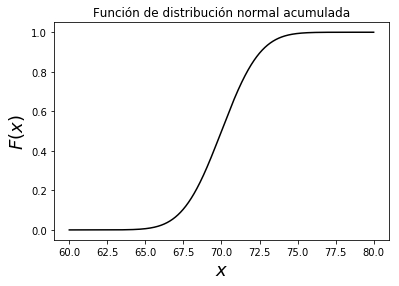

In [5]:
plt.plot(x,gauss_ac,'k')
plt.title("Función de distribución normal acumulada")
plt.xlabel("$x$",fontsize  =18) 
plt.ylabel("$F(x)$",fontsize  =18);

In [6]:
F = np.random.random(10000)
X = (sigma*pow(2,0.5)*sc.special.erfinv(2*F-1)+mu)

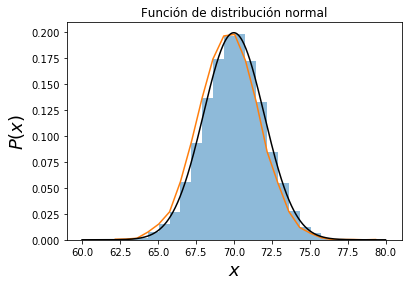

In [7]:
bins = 25
gau = plt.hist(X,bins = bins,density=True,alpha = 0.5)
plt.plot(gau[1][:bins],gau[0])
plt.plot(x,gauss,'k')
plt.title("Función de distribución normal")
plt.xlabel("$x$",fontsize  =18) 
plt.ylabel("$P(x)$",fontsize  =18);

# Función de distribución de Poisson:

\begin{equation}
f(k,\lambda) = \frac{e^{-\lambda}\lambda^{k}}{k!}
\end{equation}

In [8]:
def poisson(lam,k):
    return np.divide(np.power(np.e,-lam)*np.power(lam,k),mt.factorial(k))

In [9]:
lam = np.linspace(0,40,1000000)
k = [1,4,10]
pois = np.array([poisson(lam,k[0]),poisson(lam,k[1]),poisson(lam,k[2])])

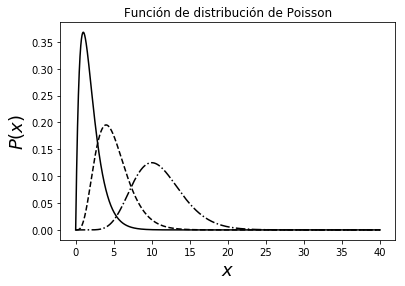

In [10]:
plt.plot(lam,pois[0],'k-')
plt.plot(lam,pois[1],'k--')
plt.plot(lam,pois[2],'k-.')
plt.title("Función de distribución de Poisson")
plt.xlabel("$x$",fontsize  =18) 
plt.ylabel("$P(x)$",fontsize  =18);

Función de distribución acumulada

\begin{equation}
\frac{\Gamma([k+1],\lambda)}{[k]!}
\end{equation}

Donde $\Gamma(x,y)$ es la función gamma incompleta

In [11]:
def poisson_ac(lam,k):
    x = np.linspace(0,k,k+1)
    s = np.zeros_like(lam)
    for i in range(len(x)):
        s = (np.divide(np.power(lam,x[i]),mt.factorial(x[i]))) + s
    return s*np.exp(-lam)

In [12]:
def poisson_ac(lam,k):
    return np.divide(sc.special.gammainc(k+1,lam),mt.factorial(k))

In [13]:
pois_ac = np.array([poisson_ac(lam,k[0]),poisson_ac(lam,k[1]),poisson_ac(lam,k[2])])

In [14]:
pois_ac[1][:]


array([0.00000000e+00, 3.55545482e-26, 1.13770762e-24, ...,
       4.16666667e-02, 4.16666667e-02, 4.16666667e-02])

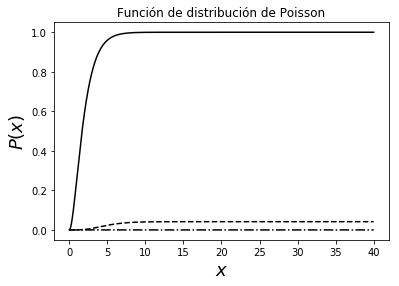

In [15]:
plt.plot(lam,pois_ac[0],'k-')
plt.plot(lam,pois_ac[1],'k--')
plt.plot(lam,pois_ac[2],'k-.')
plt.title("Función de distribución de Poisson")
plt.xlabel("$x$",fontsize  =18) 
plt.ylabel("$P(x)$",fontsize  =18);

# Distribución Beta

\begin{equation}
f(x) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)}x^{\alpha - 1}(1-x)^{\beta -1}
\end{equation}

para $0<x<1$

In [16]:
def gamma(x,a,b):
    gam = sc.special.gamma(a+b)/(sc.special.gamma(a)*sc.special.gamma(b))
    return gam*(np.power(x,a-1))*(np.power(1-x,b-1))

In [300]:
x_b = np.linspace(0.001,0.999,100000)
beta = [0.5,1,3,2,5]
alpha = [beta[0],5,1,2,2]
gam = [gamma(x_b,alpha[0],beta[0]),gamma(x_b,alpha[1],beta[1]),gamma(x_b,alpha[2],beta[2]),
       gamma(x_b,alpha[3],beta[3]),gamma(x_b,alpha[4],beta[4])]

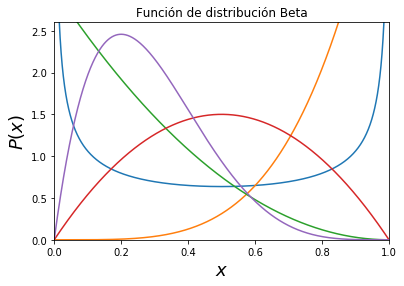

In [305]:
for i in range(len(gam)):
    plt.plot(x_b,gam[i])
plt.title("Función de distribución Beta")
plt.xlabel("$x$",fontsize  =18) 
plt.ylabel("$P(x)$",fontsize  =18)
plt.xlim(0,1)
plt.ylim(0,2.6);

In [ ]:
sc.stats.beta.

# Distribución Binomial

\begin{equation}
f(x|B_{n,p}) = \frac{n!}{(n-x)!x!} p^{x}(1-p)^{n-x}
\end{equation}

donde:

$n = 1,2,3,...$

$0<p<1$

$x = 1,2,3,...,n$

In [124]:
def binomial(p,n):
    x = np.linspace(1,n_bi,n_bi)
    B = []
    for i in range(len(x)):
        B.append(mt.factorial(n)/((mt.factorial(n-x[i]))*(mt.factorial(x[i]))))
    B = np.array(B) 
    return x, B*(p**x)*np.power(1-p,n-x)  

In [125]:
n_bi = 20
p_bi = 0.75
x_bi, binom = binomial(p_bi,n_bi)

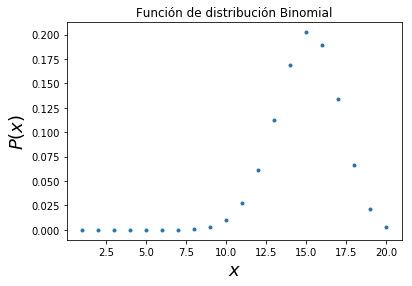

In [126]:
plt.plot(x_bi,binom,'.')
plt.title("Función de distribución Binomial")
plt.xlabel("$x$",fontsize  =18) 
plt.ylabel("$P(x)$",fontsize  =18);

In [127]:
def binomial_ac(p,n):
    x = np.linspace(1,n_bi,n_bi)
    B = []
    for i in range(len(x)):
        B.append(mt.factorial(n)/((mt.factorial(n-x[i]))*(mt.factorial(x[i]))))
    B = np.array(B) 
    F = [0]
    for i in range(len(B)):
        F.append((B[i]*(p**x[i])*np.power(1-p,n-x[i]))+F[i])
    return x,F[1:]

In [128]:
x_bi_ac, binom_ac = binomial_ac(p_bi,n_bi)

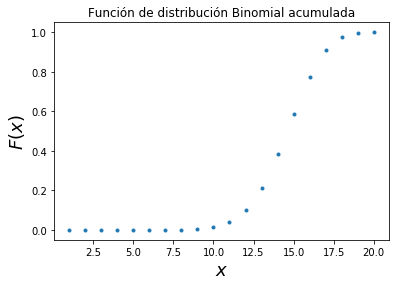

In [129]:
plt.plot(x_bi_ac,binom_ac,'.')
plt.title("Función de distribución Binomial acumulada")
plt.xlabel("$x$",fontsize  =18) 
plt.ylabel("$F(x)$",fontsize  =18);

#### Podemos hacerlo con funciones de scipy

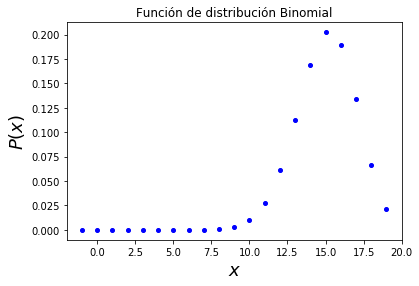

In [137]:
x = np.arange(sc.stats.binom.ppf(0.0, n_bi, p_bi),sc.stats.binom.ppf(1.0, n_bi, p_bi))
plt.plot(x,sc.stats.binom.pmf(x, n_bi, p_bi), 'b.', ms=8, label='binom pmf')
plt.title("Función de distribución Binomial")
plt.xlabel("$x$",fontsize  =18) 
plt.ylabel("$P(x)$",fontsize  =18);

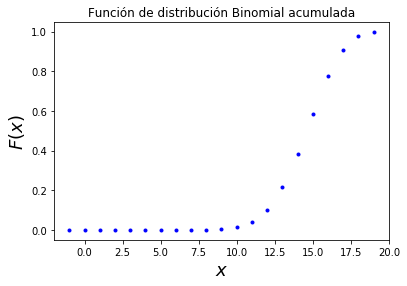

In [138]:
binom_ac = sc.stats.binom.cdf(x, n_bi, p_bi)
plt.plot(x,binom_ac,'b.')
plt.title("Función de distribución Binomial acumulada")
plt.xlabel("$x$",fontsize  =18) 
plt.ylabel("$F(x)$",fontsize  =18);

# Distribución $\chi^2$ 

\begin{equation}
f(x|B_{n,p}) = \frac{1}{2^{k/2}\Gamma(k/2)}x^{(k/2)-1}e^{-x/2}
\end{equation}

para:

$x>0$ y $k>0$

In [161]:
def chi(x,k):
    p = 1/mt.pow(2,k/2)*sc.special.gamma(k/2)
    q = np.power(x,(k/2)-1)*np.exp(-x/2)
    return p*q

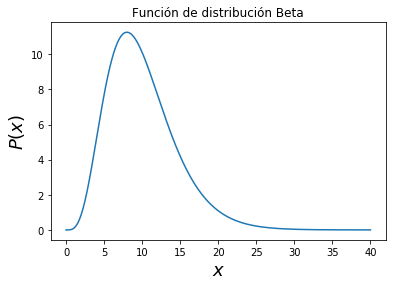

In [160]:
k  = 10
x_chi = np.linspace(0.0001,40.0001,10000)
p_chi = chi(x_chi,k)

plt.plot(x_chi,p_chi)
plt.title("Función de distribución Beta")
plt.xlabel("$x$",fontsize  =18) 
plt.ylabel("$P(x)$",fontsize  =18);

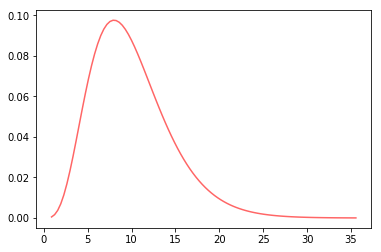

In [156]:
df = 10
x = np.linspace(sc.stats.chi2.ppf(0.0001, df),sc.stats.chi2.ppf(0.9999, df), 100)
plt.plot(x, sc.stats.chi2.pdf(x, df),'r-', alpha=0.6, label='chi2 pdf')